!pip install dmba

In [1]:
#from imblearn.over_sampling import SMOTE
import statistics as st
import numpy as np
import pandas as pd
from scipy.stats import variation
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, auc, classification_report
                            
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sn
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.datasets import make_classification
from dmba import plotDecisionTree, textDecisionTree
from sklearn.tree import DecisionTreeClassifier
import math

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from itertools import zip_longest
from matplotlib.patches import Ellipse

from sklearn.model_selection import cross_validate
#model_selection.cross_validate

import os
import random
from collections import defaultdict
from itertools import product

In [95]:
df_data = pd.read_csv('ticdata2000.txt',sep='\t', header = None)
df_eval = pd.read_csv('ticeval2000.txt',sep='\t', header = None)
df_tgts = pd.read_csv('tictgts2000.txt',sep='\t', header = None)


In [96]:
df_data2 = df_data[[0,  1,  3,  4,  5,  6, 10, 11, 13, 14, 15, 17, 19, 20, 21, 23, 25,
       26, 27, 28, 29, 32, 33, 35, 36, 39, 40, 41, 42, 43, 45, 46, 50, 54,
       57, 58, 60, 63, 79, 82]]

df_eval2 = df_eval[[0,  1,  3,  4,  5,  6, 10, 11, 13, 14, 15, 17, 19, 20, 21, 23, 25,
       26, 27, 28, 29, 32, 33, 35, 36, 39, 40, 41, 42, 43, 45, 46, 50, 54,
       57, 58, 60, 63, 79, 82]]

In [97]:
X = df_data[[0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]]

y = df_data[85]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(df_data2, y, test_size=0.3, random_state=12)

Código para efetuar cross validation

scores = cross_val_score(clf, df_data[X], df_data[y], cv=5)
scores

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [64]:
df_tgts.shape

(4000, 1)

<h1>Naive Baies</h1>

In [100]:
naive = MultinomialNB()
naive.fit(X_train, y_train)

fitted = naive.predict(df_eval2)

In [101]:
scores = cross_val_score(naive, X, y, cv=5)
scores.mean()

0.7571319853103844

Recall =  0.61154780891623
Precision =  0.5365257142857143
AUC =  0.6645032813763464


C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


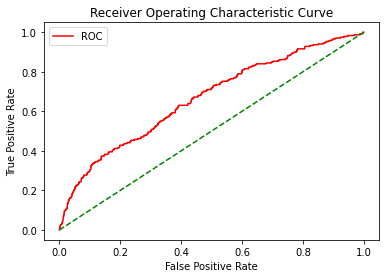

In [102]:
prob = naive.predict_proba(df_eval2)
prob = prob[:, 1]
print('Recall = ', recall_score(df_tgts, fitted, average='macro'))

print('Precision = ' ,precision_score(df_tgts, fitted, average='macro'))

fpr, tpr, thresholds = metrics.roc_curve(df_tgts, fitted, pos_label=2)
print('AUC = ', metrics.roc_auc_score(df_tgts, prob))


def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()



fper, tper, thresholds = roc_curve(df_tgts, prob)
plot_roc_curve(fper, tper)

In [104]:
confusion_matrix(df_tgts, naive.predict(df_eval2))

array([[2989,  773],
       [ 136,  102]], dtype=int64)

<h1>Regressão logistica</h1>

In [105]:
model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')

In [106]:
model.fit(X_train, y_train)

LogisticRegression(C=1e+42, solver='liblinear')

In [112]:
scores = cross_val_score(model, X, y, cv=3)
scores.mean()

0.9376501997942747

In [108]:
yhat = model.predict_proba(df_eval2)

In [109]:
yhat = yhat[:, 1]

In [111]:
confusion_matrix(df_tgts, model.predict(df_eval2))

array([[3756,    6],
       [ 234,    4]], dtype=int64)

In [114]:
acuracia = accuracy_score(df_tgts, model.predict(df_eval2))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.9400 de acurácia.


In [20]:
print(classification_report(df_tgts, model.predict(df_eval)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.28      0.02      0.04       238

    accuracy                           0.94      4000
   macro avg       0.61      0.51      0.50      4000
weighted avg       0.90      0.94      0.91      4000



In [116]:
print('AUC: %0.2f' % roc_auc_score(df_tgts, yhat))

AUC: 0.71


In [118]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

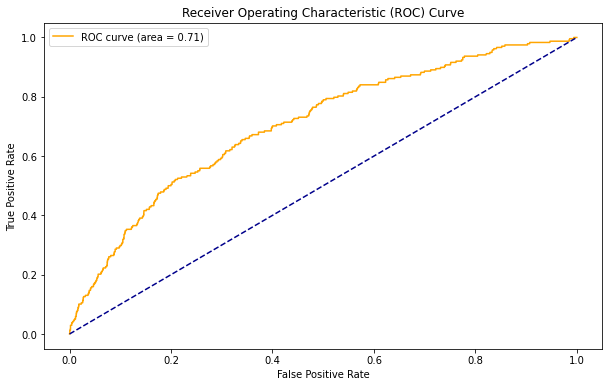

In [119]:
plot_roc_curve(df_tgts, yhat)

<h1>Arvore de decisão</h1>

In [121]:
X = predictors = X_train
y = y_train

data_tree = DecisionTreeClassifier(criterion='entropy',
                                   min_impurity_decrease=0.003)
data_tree.fit(X, y)
plotDecisionTree(data_tree, feature_names=predictors, class_names=data_tree.classes_)

'You need to install pydotplus to visualize decision trees'

In [122]:
print(textDecisionTree(data_tree))

node=0 test node: go to node 1 if 31 <= 5.5 else to node 6
  node=1 test node: go to node 2 if 36 <= 2.5 else to node 5
    node=2 test node: go to node 3 if 14 <= 3.5 else to node 4
      node=3 leaf node: [[0.986, 0.014]]
      node=4 leaf node: [[0.956, 0.044]]
    node=5 leaf node: [[0.2, 0.8]]
  node=6 test node: go to node 7 if 35 <= 2.5 else to node 10
    node=7 test node: go to node 8 if 36 <= 0.5 else to node 9
      node=8 leaf node: [[0.936, 0.064]]
      node=9 leaf node: [[0.25, 0.75]]
    node=10 test node: go to node 11 if 11 <= 2.5 else to node 12
      node=11 leaf node: [[0.716, 0.284]]
      node=12 leaf node: [[0.879, 0.121]]


In [123]:
def entropyFunction(x):
    if x == 0: return 0
    return -x * math.log(x, 2) - (1 - x) * math.log(1 - x, 2)

def giniFunction(x):
    return x * (1 - x)

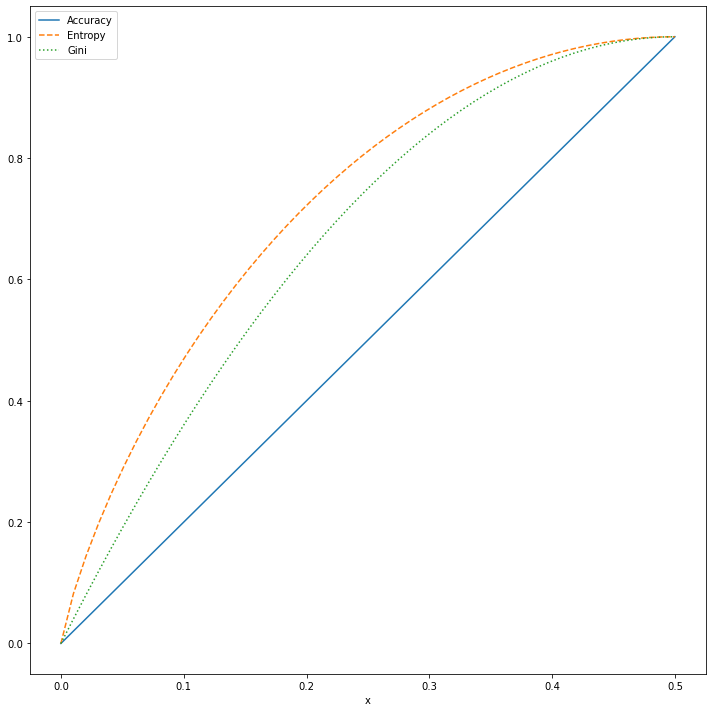

In [124]:
x = np.linspace(0, 0.5, 50)
impure = pd.DataFrame({
    'x': x,
    'Accuracy': 2 * x,
    'Gini': [giniFunction(xi) / giniFunction(.5) for xi in x],
    'Entropy': [entropyFunction(xi) for xi in x],
})

fig, ax = plt.subplots(figsize=(10, 10))

impure.plot(x='x', y='Accuracy', ax=ax, linestyle='solid')
impure.plot(x='x', y='Entropy', ax=ax, linestyle='--')
impure.plot(x='x', y='Gini', ax=ax, linestyle=':')

plt.tight_layout()
plt.show()

In [125]:
data_tree = DecisionTreeClassifier(criterion='entropy',
                                   min_impurity_decrease=0.003)
data_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.003)

In [126]:
data_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.10046426, 0.        , 0.        , 0.07095836,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.52545895, 0.        , 0.        , 0.        ,
       0.12007327, 0.18304515, 0.        , 0.        , 0.        ])

In [128]:
confusion_matrix(df_tgts, data_tree.predict(df_eval2))

array([[3760,    2],
       [ 237,    1]], dtype=int64)

In [130]:
conf_mat = confusion_matrix(df_tgts, data_tree.predict(df_eval2))

In [131]:

print('Precision', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall', conf_mat[0, 0] / sum(conf_mat[0, :]))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

Precision 0.9407055291468601
Recall 0.9994683678894205
Specificity 0.004201680672268907


fpr, tpr, thresholds = roc_curve(df_tgts, data_tree.predict_proba(df_eval2), 
                                 pos_label='default')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

In [133]:
y.shape

(4075,)

<h1>KNN</h1>

In [24]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [36]:

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn.predict(df_eval)
print (knn.predict_proba(df_eval))

fitted3 = knn.predict(df_eval)

[[1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 ...
 [1.  0. ]
 [0.7 0.3]
 [0.9 0.1]]


In [37]:
print(confusion_matrix(df_tgts, fitted3 ))

[[3760    2]
 [ 236    2]]


In [38]:
scoresknn = cross_val_score(knn, X,y, cv=5)
scoresknn

array([0.93991416, 0.93991416, 0.94072165, 0.94072165, 0.93986254])

Recall =  0.5039358646169791
Precision =  0.7204704704704705
AUC =  0.6267752715121135


C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


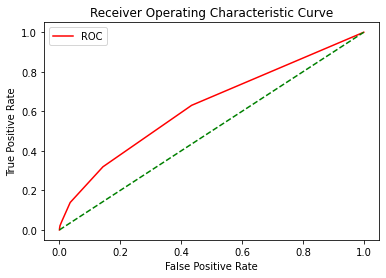

In [41]:
fitted = fitted3
prob= knn.predict_proba(df_eval)
prob = prob[:, 1]
print('Recall = ', recall_score(df_tgts, fitted, average='macro'))

print('Precision = ' ,precision_score(df_tgts, fitted, average='macro'))

fpr, tpr, thresholds = metrics.roc_curve(df_tgts, fitted, pos_label=2)
print('AUC = ', metrics.roc_auc_score(df_tgts, prob))


def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()



fper, tper, thresholds = roc_curve(df_tgts, prob)
plot_roc_curve(fper, tper)

In [43]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scoresknn.mean(), scoresknn.std()))

0.94 accuracy with a standard deviation of 0.00
